In [1]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image

# read image
img = cv2.imread("testImg.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)




In [2]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [3]:
neighbourRadius = 8
class blob():
    def __init__(self, x, y):
        self.elements = set()
        self.neighbours = set()
        self.edges = set()

        self.upperY = y+10
        self.lowerY = y-10

        self.lowerX = x-10
        self.upperX = x+10

        self.add_element(x, y)
        self.last_element = (x,y)




    def add_element(self, x,y, is_edge=False):
        if len(self.elements)==0 or self.in_neighbours(x,y):
            self.elements.add((x,y))
            
            if abs(self.upperY-y)<neighbourRadius:
              self.upperY = y+10
            if abs(y - self.lowerY)<neighbourRadius:
              self.lowerY = y-10            
            if abs(self.upperX-x)<neighbourRadius:
              self.upperX = x+10
            if abs(x - self.lowerX)<neighbourRadius:
              self.lowerX = x-10
            
            if is_edge:
               self.add_to_edges(x,y)

            self.last_element = (x,y)
            
            return 1
        return 0
    
    def last2edge():
       self.add_to_edge(self.last_element)

    def add_to_edges(x,y):
       self.edges.add((x,y))
            
    def in_neighbours(self, x,y):
         if (x<self.upperX and x>self.lowerX) and (self.lowerY<y and self.upperY>y):
             return True
         
         return False
    
    def area(self):
      return len(self.elements)

# get white pixel

# create blobs
# get area of the blobs
# draw bounding boxes using extremities


In [4]:
blobs = []

print(gray.shape)
h, w = gray.shape[0], gray.shape[1]

for y in range(h):
    for x in range(w):
        intensity = 0
        if gray[y, x]>100:
            intensity = 255
        if intensity ==255:
            added = 0
            for b in blobs:
                added = b.add_element(x,y)
                if added:
                    break
            if not(added):
                blobs.append(blob(x,y))



(720, 1280)


In [5]:
import numpy as np
cen = []
for b in blobs:
  s = np.array(list(b.elements))
  loc = sum(s)/len(s)
  cen.append(loc)

In [6]:
print(cen[0])

[244.27128713 217.53797321]


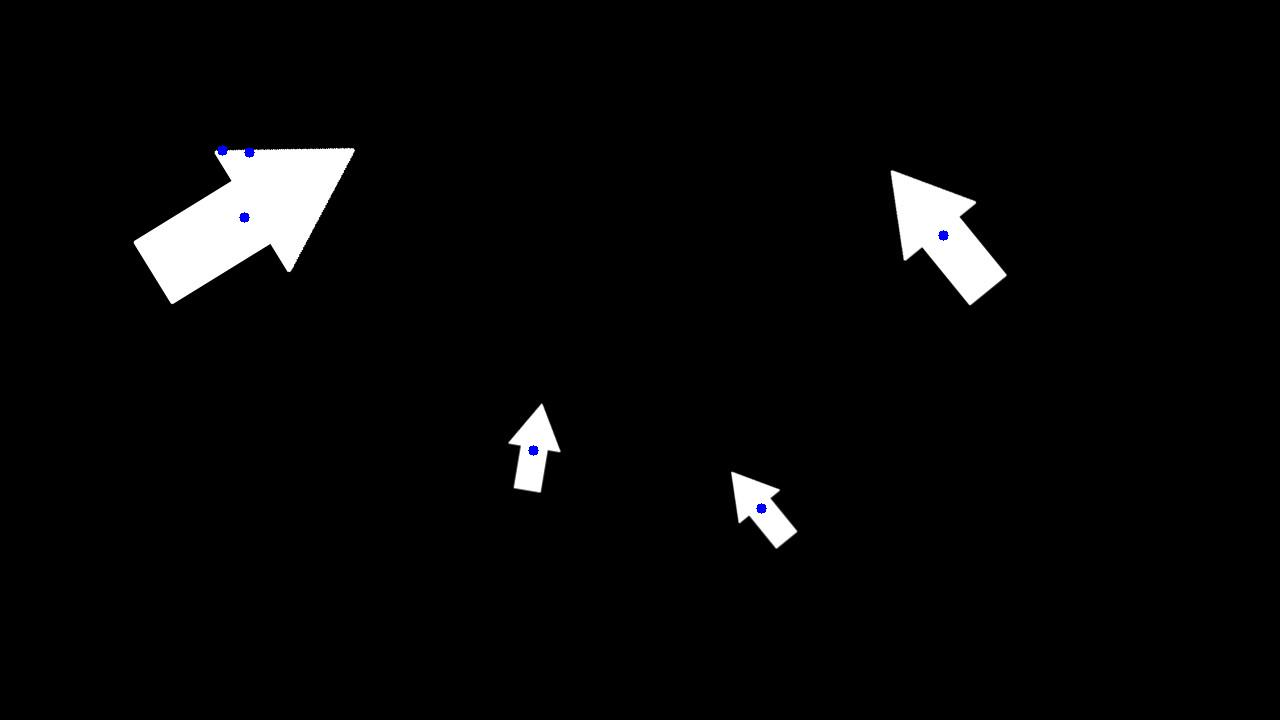

In [7]:
gray2 = img
for c in cen:
  gray2 = cv2.circle(gray2, (int(c[0]),int(c[1])), radius=5, color=(0, 0, 255), thickness=-1)

showarray(gray2) 


In [8]:
areas = []
for b in blobs:
  areas.append(b.area())
bigB = blobs[np.argmax(areas)]

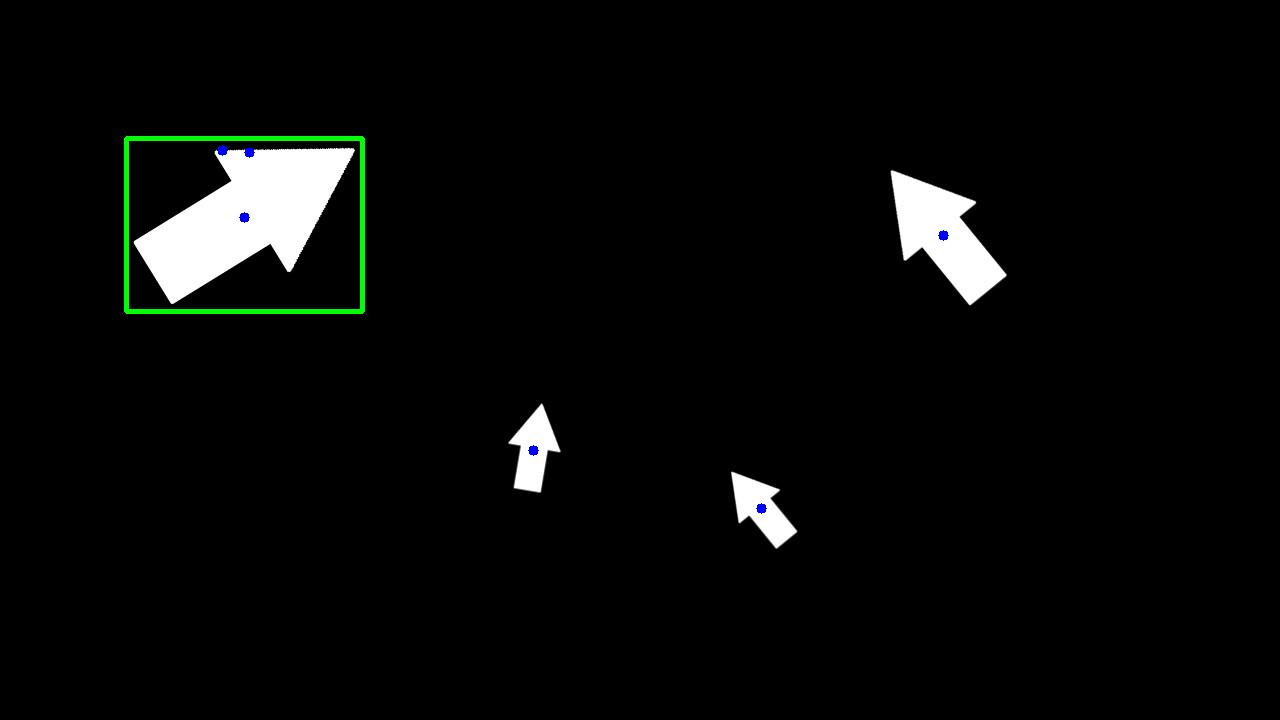

In [9]:
showarray(cv2.rectangle(img,(bigB.lowerX,bigB.lowerY),(bigB.upperX,bigB.upperY),(0,255,0),3))

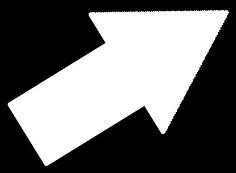

(173, 236)


In [10]:
largest_arrow = gray[bigB.lowerY:bigB.upperY,bigB.lowerX:bigB.upperX]
showarray(largest_arrow[0::])
print(largest_arrow[0::].shape)

In [11]:
def erodeImage():
    pass

In [12]:
def simpleEdge(inImg):
    # Define a kernel for detecting edges
    kernel = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
    
    # Define the size of the image
    height = len(inImg)
    width = len(inImg[0])
    
    # Create a new image to hold the edge detection result
    result = [[0 for x in range(width)] for y in range(height)]
    
    # Iterate over the image pixels
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Apply the kernel to the pixel and its neighbors
            sum = 0
            for ky in range(3):
                for kx in range(3):
                    px = x + (kx - 1)
                    py = y + (ky - 1)
                    sum += inImg[py][px] * kernel[ky][kx]
        
            # Set the result pixel based on the kernel sum
        
            if sum > 255:
                result[y][x] = 255
    
    # Return the result image
    return result

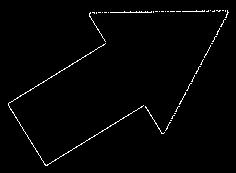

In [13]:
outImg = simpleEdge(largest_arrow[0::])
showarray(outImg)

In [14]:
def myHough():
    pass

In [15]:
def hough_transform(image, rho_res=1, theta_res=np.pi/180):
    # Define the range of rho and theta values
    height, width = image.shape
    diag_len = np.ceil(np.sqrt(height**2 + width**2))
    rho_range = np.arange(-diag_len, diag_len + 1, rho_res)
    theta_range = np.arange(-90, 90, theta_res)
    num_rho = len(rho_range)
    num_theta = len(theta_range)

    # Initialize the accumulator array
    accumulator = np.zeros((num_rho, num_theta), dtype=np.uint8)

    # Loop over all edge pixels in the input image
    y_idxs, x_idxs = np.nonzero(image)
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        # Loop over all possible theta values
        for j in range(num_theta):
            theta = theta_range[j] * np.pi / 180

            # Calculate the corresponding rho value
            rho = int(x * np.cos(theta) + y * np.sin(theta)) + diag_len

            # Increment the accumulator at the corresponding (rho, theta) location
            
            accumulator[int(rho), j] += 1

    return accumulator, rho_range, theta_range


In [16]:
r_theta_array = hough_transform(np.array(outImg))


In [ ]:
r_theta_array[0].shape,r_theta_array[1],r_theta_array[2]

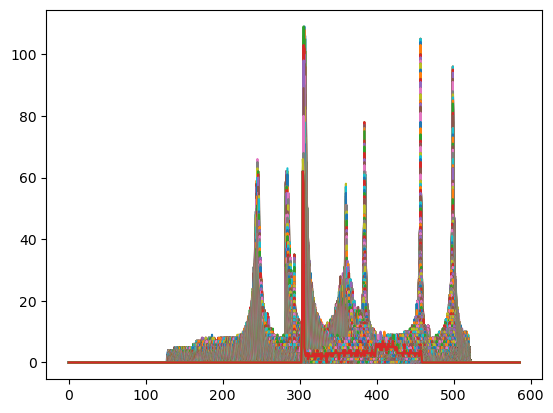

In [18]:
import matplotlib.pyplot as plt
fig = plt.plot(r_theta_array[0])
plt.show()

In [19]:
def indices_greater_than_threshold(arr, threshold):
    indices = np.where(arr > threshold)
    return indices

In [20]:
rTheta = r_theta_array[0]
lines_rho_theta = np.where(rTheta>90)

In [21]:
print(lines_rho_theta[0][0],lines_rho_theta[1][0])

305 10288


In [22]:
index2theta = -90 + (10285*np.pi)/180
index2theta

89.50711356761678

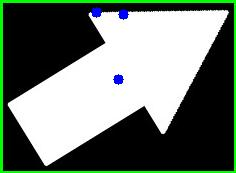

In [23]:
import math
cdst = np.copy(img[bigB.lowerY:bigB.upperY,bigB.lowerX:bigB.upperX]
)
showarray(cdst)


In [24]:

for i in range(0, len(lines_rho_theta[0])):
    rho = lines_rho_theta[0][i]-293
    theta = (lines_rho_theta[1][i]*np.pi/180)-90
   
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 100*(-b)), int(y0 + 100*(a)))
    pt2 = (int(x0 - 100*(-b)), int(y0 - 100*(a)))
    cv2.line(cdst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
    

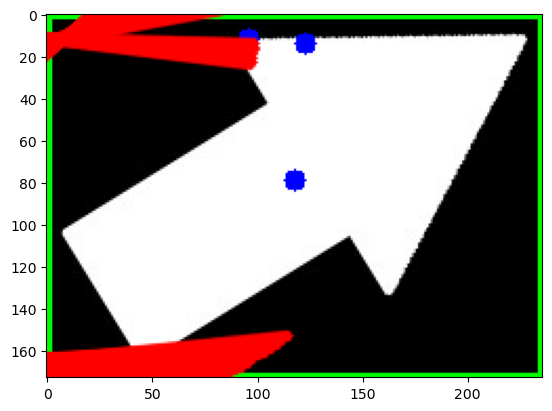

In [25]:
plt.imshow(cdst)

In [26]:
cdst.shape

(173, 236, 3)

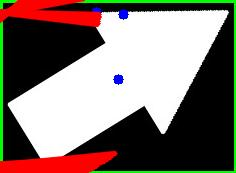

In [27]:
showarray(cdst)

In [43]:
testLocMax = [[1,1,1,1,1],
              [1,2,1,1,1],
              [0.1,0.2,0.2,0.1,0.1],
              [0.2,0.5,0.3,0.2,0.2],
              [0.3,0.1,0.1,0.1,0.1]]
testLocMax = np.array(testLocMax)

In [42]:
r_theta_array[0].shape

(587, 10314)

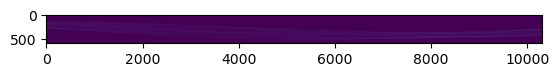

In [46]:
plt.imshow(r_theta_array[0])

(10314, 587)
(10314, 587)
(587, 10314)


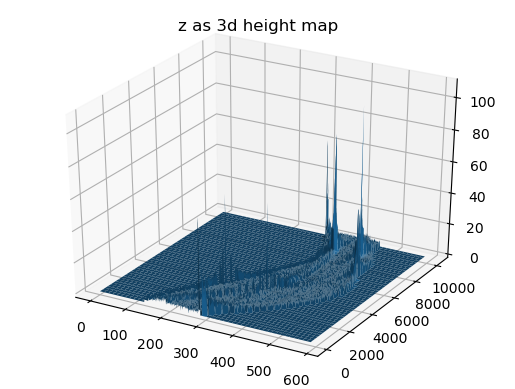

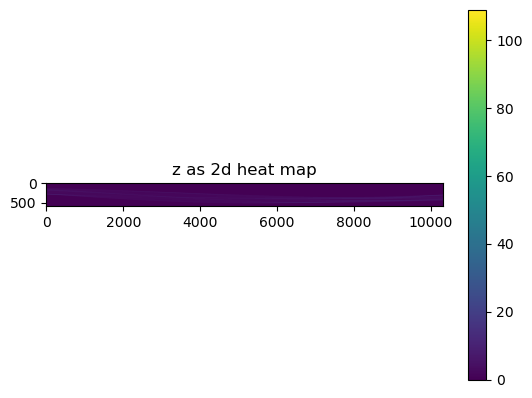

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
zt = r_theta_array[0]

def plot_heatmap(z):
    x, y = np.meshgrid(range(z.shape[0]), range(z.shape[1]))
    print(x.shape)
    print(y.shape)
    print(z.shape)
    # show hight map in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x.T, y.T, z)
    plt.title('z as 3d height map')
    plt.show()

    # show hight map in 2d
    plt.figure()
    plt.title('z as 2d heat map')
    p = plt.imshow(z)
    plt.colorbar(p)
    plt.show()
plot_heatmap(z)

In [140]:
def get_local_maxima(mat, step):
    r_theta = []
    if step%2==0:
        print("Steo better be Odd:)")
        return 0
    height, width = mat.shape
    for h in range(0,height-1):
        for w in range(0,width-1):
            slice = mat[h:h+step, w:w+step]

            if slice.shape!=(step,step):
                continue
            bool_threshold = slice>=slice[slice.shape[0]//2,slice.shape[1]//2]
            trueNum = np.sum(bool_threshold)
            #print(trueNum)
            if trueNum==1:
                r_theta.append((h+slice.shape[0]//2,w+slice.shape[1]//2))
    return r_theta

In [152]:
testLocMax = [[1,1,1,1,1],
              [1,2,1,1,1],
              [0.1,0.2,0.2,0.1,0.1],
              [0.2,0.5,0.3,0.2,0.2],
              [0.3,0.1,0.1,0.1,0.1]]

rTheta_idx = get_local_maxima(zt,151)

In [153]:
len(rTheta_idx)

12

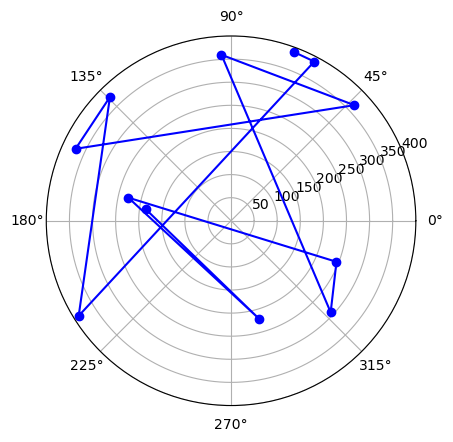

In [154]:
# visualze the r theta values
import matplotlib.pyplot as plt
r_values = []
theta_values = []

for rt in rTheta_idx:
    r_values.append(rt[0])
    theta_values.append(rt[1])

# Convert to Cartesian coordinates
x_values = [r * np.cos(theta) for r, theta in zip(r_values, theta_values)]
y_values = [r * np.sin(theta) for r, theta in zip(r_values, theta_values)]

# Plot the lines
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_values, r_values, 'bo-')

# Show the plot
plt.show()

In [155]:
len(t)

NameError: name 't' is not defined

In [ ]:
import scipy
from scipy import signal

[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. 49. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
1.0
(10314, 587)
(10314, 587)
(587, 10314)


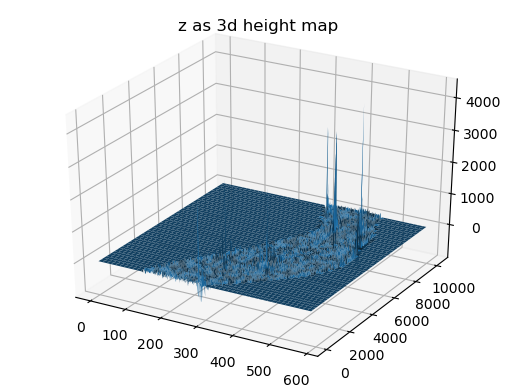

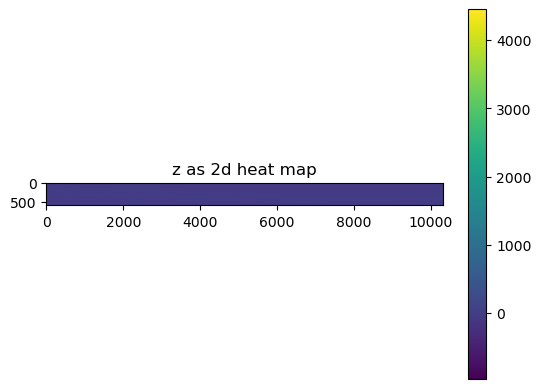

(10314, 587)
(10314, 587)
(587, 10314)


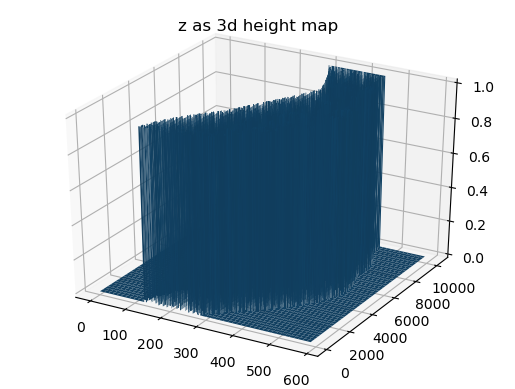

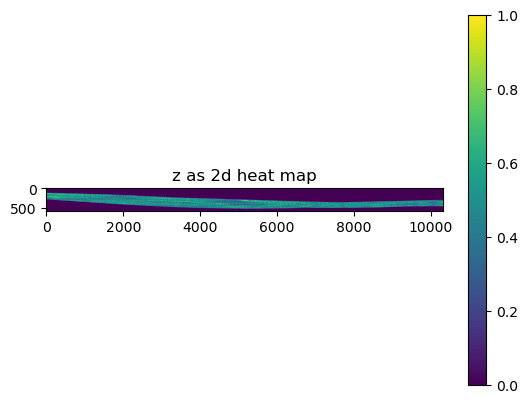

In [ ]:

step = 7 # better be odd
filter_kernel = -1*np.ones((step, step))
filter_kernel[(step-1)//2][(step-1)//2] = step*step
print(filter_kernel)
print(np.sum(filter_kernel))

res = scipy.signal.convolve2d(zt, filter_kernel,
                               mode='same', boundary='fill', fillvalue=0)
plot_heatmap(res)

plot_heatmap(res>0.5)